In [1]:
import pandas as pd

training = pd.read_csv('titanic-train.csv')

In [2]:
training.info()
# судя по выводу, в таблице присутствуют недостающие значения, 
# т.к. различается число "Non-Null Count"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  915 non-null    int64  
 1   Survived     915 non-null    int64  
 2   Pclass       915 non-null    int64  
 3   Name         915 non-null    object 
 4   Gender       915 non-null    object 
 5   Age          738 non-null    float64
 6   SibSp        915 non-null    int64  
 7   Parch        915 non-null    int64  
 8   Ticket       915 non-null    object 
 9   Fare         915 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     914 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 85.9+ KB


In [3]:
training.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",male,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S


In [4]:
training["Gender"] = training["Gender"].apply(
    lambda toLabel: 0 if toLabel == 'male' else 1
)

In [5]:
training["Age"].fillna(training["Age"].mean(), inplace=True)

In [6]:
training.info()
training.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  915 non-null    int64  
 1   Survived     915 non-null    int64  
 2   Pclass       915 non-null    int64  
 3   Name         915 non-null    object 
 4   Gender       915 non-null    int64  
 5   Age          915 non-null    float64
 6   SibSp        915 non-null    int64  
 7   Parch        915 non-null    int64  
 8   Ticket       915 non-null    object 
 9   Fare         915 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     914 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 85.9+ KB


,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",0,31.000000,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",0,35.000000,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",0,29.970867,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",0,49.000000,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.000000,0,0,7553,9.8375,NaN,S


In [7]:
y_target = training["Survived"].values

In [8]:
columns = ["Fare", "Pclass", "Gender", "Age", "SibSp"]
X_input = training[list(columns)].values

In [9]:
from sklearn import tree

clf_train = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = 3)

clf_train = clf_train.fit(X_input, y_target)

In [10]:
clf_train.score(X_input, y_target)

0.8163934426229508

In [11]:
from six import StringIO
with open('titanic.dot', 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns)

In [12]:
!dot -Tpng titanic.dot -o titanic.png

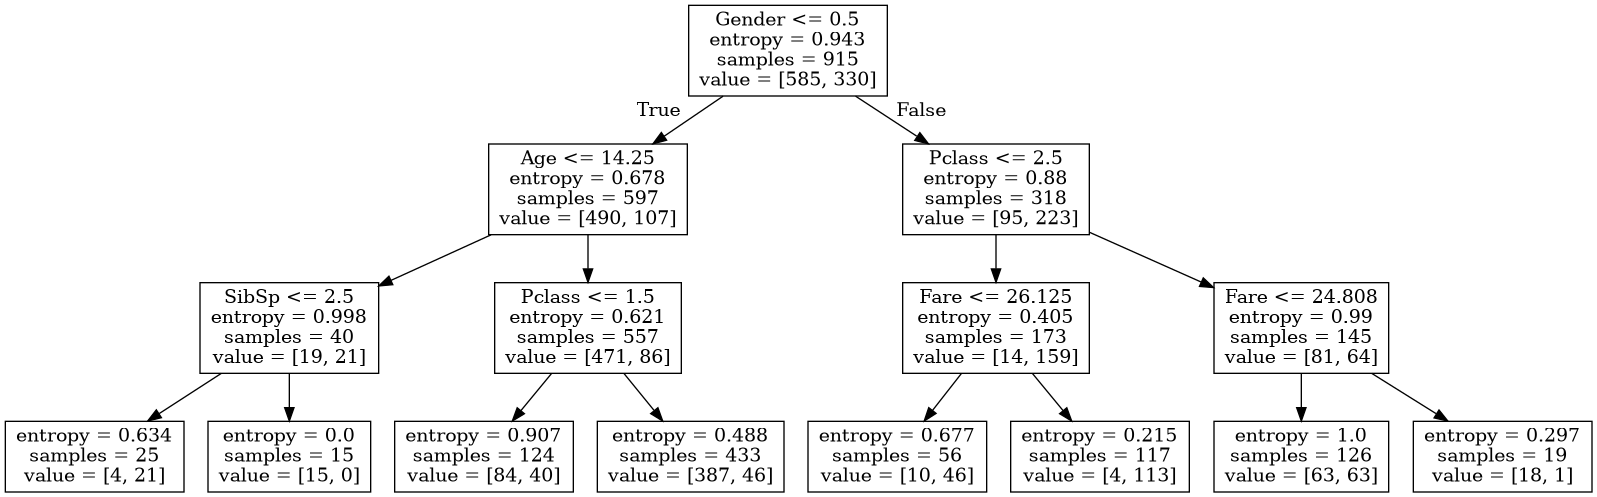

In [13]:
from IPython.display import Image

Image("titanic.png")

In [14]:
testing = pd.read_csv('titanic-test.csv')

In [15]:
testing.info()
# 393 записи
# снова отсутствует у "Age"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  393 non-null    int64  
 1   Survived     393 non-null    int64  
 2   Pclass       393 non-null    int64  
 3   Name         393 non-null    object 
 4   Gender       393 non-null    object 
 5   Age          307 non-null    float64
 6   SibSp        393 non-null    int64  
 7   Parch        393 non-null    int64  
 8   Ticket       393 non-null    object 
 9   Fare         393 non-null    float64
 10  Cabin        93 non-null     object 
 11  Embarked     392 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 37.0+ KB


In [16]:
testing["Gender"] = testing["Gender"].apply(
    lambda toLabel: 0 if toLabel == 'male' else 1
)

In [17]:
testing["Age"].fillna(testing["Age"].mean(), inplace=True)

In [18]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  393 non-null    int64  
 1   Survived     393 non-null    int64  
 2   Pclass       393 non-null    int64  
 3   Name         393 non-null    object 
 4   Gender       393 non-null    int64  
 5   Age          393 non-null    float64
 6   SibSp        393 non-null    int64  
 7   Parch        393 non-null    int64  
 8   Ticket       393 non-null    object 
 9   Fare         393 non-null    float64
 10  Cabin        93 non-null     object 
 11  Embarked     392 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 37.0+ KB


In [19]:
X_input = testing[list(columns)].values

In [20]:
target_labels = clf_train.predict(X_input)

target_labels = pd.DataFrame({'Est_Survival': target_labels, 'Name': testing['Name']})

target_labels.head()

,Est_Survival,Name
0,0,"Coleridge, Mr. Reginald Charles"
1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn..."
2,0,"Windelov, Mr. Einar"
3,1,"Minahan, Miss. Daisy E"
4,0,"Wilkes, Mrs. James (Ellen Needs)"


In [21]:
import numpy as np

all_data = pd.read_csv('titanic_all.csv')

testing_results = pd.merge(target_labels, all_data[['Name', 'Survived']], on=['Name'])
acc = np.sum(testing_results['Est_Survival'] == testing_results['Survived']) / float(len(testing_results))
print(acc)

0.7588832487309645


In [22]:
all_data = pd.read_csv('titanic_all.csv', usecols=['Survived', 'Pclass', 'Gender','Age','SibSp','Fare'])
all_data.info()
all_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1308 non-null   int64  
 1   Pclass    1308 non-null   int64  
 2   Gender    1308 non-null   object 
 3   Age       1045 non-null   float64
 4   SibSp     1308 non-null   int64  
 5   Fare      1308 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 61.4+ KB


,Survived,Pclass,Gender,Age,SibSp,Fare
0,1,1,female,29.0000,0,211.3375
1,1,1,male,0.9167,1,151.5500
2,0,1,female,2.0000,1,151.5500
3,0,1,male,30.0000,1,151.5500
4,0,1,female,25.0000,1,151.5500


In [23]:
all_data["Gender"] = all_data["Gender"].apply(
    lambda toLabel: 0 if toLabel == 'male' else 1
)

In [24]:
all_data["Age"].fillna(all_data["Age"].mean(), inplace=True)

In [25]:
all_data.head()

,Survived,Pclass,Gender,Age,SibSp,Fare
0,1,1,1,29.0000,0,211.3375
1,1,1,0,0.9167,1,151.5500
2,0,1,1,2.0000,1,151.5500
3,0,1,0,30.0000,1,151.5500
4,0,1,1,25.0000,1,151.5500


In [26]:
from sklearn.model_selection import train_test_split

X = all_data[list(columns)].values
y = all_data["Survived"].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 0)

In [27]:
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

clf_train = clf_train.fit(X_train, y_train)

In [28]:
train_score = str(clf_train.score(X_train, y_train))
test_score = str(clf_train.score(X_test, y_test))

print('Training score = '+ train_score + ' Testing score = '+test_score)

Training score = 0.8201530612244898 Testing score = 0.8053435114503816


In [29]:
clf_train = tree.DecisionTreeClassifier(criterion="gini", splitter="random", max_depth=3)

clf_train = clf_train.fit(X_train, y_train)

train_score = str(clf_train.score(X_train, y_train))
test_score = str(clf_train.score(X_test, y_test))

print('Training score = '+ train_score + ' Testing score = '+test_score)

Training score = 0.7869897959183674 Testing score = 0.7767175572519084
